In [127]:
a = "this is python"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

In [2]:
df = pd.read_csv("Data.csv")

In [3]:
df

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,0


In [4]:
df.shape

(12684, 25)

In [5]:
df["Accept(Y/N?)"].value_counts()

1    7210
0    5474
Name: Accept(Y/N?), dtype: int64

In [6]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
for column in df.columns:
    print(f'Column: {column}')
    print(df[column].value_counts())
    print('\n')

Column: destination
No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64


Column: passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64


Column: weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64


Column: temperature
80    6528
55    3840
30    2316
Name: temperature, dtype: int64


Column: coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64


Column: expiration
1d    7091
2h    5593
Name: expiration, dtype: int64


Column: gender
Female    6511
Male      6173
Name: gender, dtype: int64


Column: age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64


Column: maritalStatus
Married partner      5100
Single            

In [8]:
df.isnull().sum().dtypes

dtype('int64')

# Dropping irrelevant columns:-

In [9]:
df1 = df.copy()

In [10]:
df1.drop(columns = ["car", "toCoupon_GEQ5min", "temperature", "education", "destination", "maritalStatus", "direction_opp"], inplace = True)

In [11]:
df1.isnull().sum()

passanger                 0
weather                   0
coupon                    0
expiration                0
gender                    0
age                       0
has_children              0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
Accept(Y/N?)              0
dtype: int64

# Handling Missing Values:-

In [12]:
df1.columns

Index(['passanger', 'weather', 'coupon', 'expiration', 'gender', 'age',
       'has_children', 'occupation', 'income', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'Accept(Y/N?)'],
      dtype='object')

## Imputation:-

In [13]:
columns = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
df1[columns] = df1[columns].fillna(df1[columns].mode().iloc[0])

In [14]:
df1[columns].dtypes

Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
dtype: object

In [15]:
df1.head()

,passanger,weather,coupon,expiration,gender,age,has_children,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Accept(Y/N?)
0,Alone,Sunny,Restaurant(<20),1d,Female,21,1,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,1
1,Friend(s),Sunny,Coffee House,2h,Female,21,1,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0
2,Friend(s),Sunny,Carry out & Take away,2h,Female,21,1,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1
3,Friend(s),Sunny,Coffee House,2h,Female,21,1,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0
4,Friend(s),Sunny,Coffee House,1d,Female,21,1,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0


In [16]:
df1.isnull().sum()

passanger               0
weather                 0
coupon                  0
expiration              0
gender                  0
age                     0
has_children            0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
Accept(Y/N?)            0
dtype: int64

In [17]:
df1.corr()

,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Accept(Y/N?)
has_children,1.000000,0.078211,-0.013722,-0.031620,-0.045557
toCoupon_GEQ15min,0.078211,1.000000,0.324984,-0.303533,-0.081602
toCoupon_GEQ25min,-0.013722,0.324984,1.000000,-0.192319,-0.103633
direction_same,-0.031620,-0.303533,-0.192319,1.000000,0.014570
Accept(Y/N?),-0.045557,-0.081602,-0.103633,0.014570,1.000000


# Encoding:-

In [18]:
df1.dtypes

passanger               object
weather                 object
coupon                  object
expiration              object
gender                  object
age                     object
has_children             int64
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
Accept(Y/N?)             int64
dtype: object

In [19]:
object_data = df1.select_dtypes(include = ["object"])

In [20]:
object_data.columns

Index(['passanger', 'weather', 'coupon', 'expiration', 'gender', 'age',
       'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50'],
      dtype='object')

In [21]:
object_data.shape

(12684, 13)

In [22]:
df1 = pd.get_dummies(df1, columns=object_data.columns, drop_first = True)

In [23]:
df1

,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Accept(Y/N?),passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Snowy,weather_Sunny,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_2h,gender_Male,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,1,1,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
12680,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
12681,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
12682,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 75 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   has_children                                          12684 non-null  int64
 1   toCoupon_GEQ15min                                     12684 non-null  int64
 2   toCoupon_GEQ25min                                     12684 non-null  int64
 3   direction_same                                        12684 non-null  int64
 4   Accept(Y/N?)                                          12684 non-null  int64
 5   passanger_Friend(s)                                   12684 non-null  uint8
 6   passanger_Kid(s)                                      12684 non-null  uint8
 7   passanger_Partner                                     12684 non-null  uint8
 8   weather_Snowy                                         12684 non-null  uint8


In [25]:
df1.describe()

,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Accept(Y/N?),passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Snowy,weather_Sunny,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_2h,gender_Male,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
count,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.00000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,0.414144,0.561495,0.119126,0.214759,0.568433,0.260013,0.079313,0.084752,0.110769,0.793835,0.188663,0.315043,0.117629,0.219647,0.440949,0.486676,0.201750,0.160754,0.103989,0.086172,0.054084,0.140965,0.043125,0.049590,0.003469,0.042889,0.019000,0.111006,0.012141,0.074346,0.003390,0.023494,0.019237,0.019079,0.010486,0.017266,0.013403,0.066067,0.050378,0.013797,0.008672,0.013797,0.039026,0.086172,0.124882,0.017187,0.147430,0.144355,0.158704,0.142305,0.130795,0.066698,0.067565,0.070561,0.082151,0.084831,0.027515,0.274519,0.418165,0.140650,0.087591,0.283980,0.233523,0.335699,0.12567,0.146326,0.012062,0.282245,0.101309,0.165011,0.017345,0.057395,0.020814,0.494008,0.168401
std,0.492593,0.496224,0.323950,0.410671,0.495314,0.438658,0.270237,0.278524,0.313859,0.404566,0.391256,0.464551,0.322180,0.414024,0.496520,0.499842,0.401323,0.367318,0.305259,0.280628,0.226192,0.347999,0.203147,0.217105,0.058798,0.202614,0.136531,0.314152,0.109521,0.262343,0.058128,0.151473,0.137362,0.136809,0.101865,0.130265,0.114996,0.248410,0.218733,0.116652,0.092724,0.116652,0.193663,0.280628,0.330598,0.129973,0.354548,0.351463,0.365414,0.349377,0.337189,0.249508,0.251009,0.256101,0.274605,0.278641,0.163585,0.446289,0.493277,0.347673,0.282710,0.450945,0.423089,0.472253,0.33149,0.353447,0.109169,0.45011

# Normalization / Scaling:-

In [26]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [27]:
df2 = df1.copy()

In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 75 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   has_children                                          12684 non-null  int64
 1   toCoupon_GEQ15min                                     12684 non-null  int64
 2   toCoupon_GEQ25min                                     12684 non-null  int64
 3   direction_same                                        12684 non-null  int64
 4   Accept(Y/N?)                                          12684 non-null  int64
 5   passanger_Friend(s)                                   12684 non-null  uint8
 6   passanger_Kid(s)                                      12684 non-null  uint8
 7   passanger_Partner                                     12684 non-null  uint8
 8   weather_Snowy                                         12684 non-null  uint8


In [29]:
x = df2.drop(["Accept(Y/N?)"],axis=1)
y = df2["Accept(Y/N?)"]

In [30]:
x

,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Snowy,weather_Sunny,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_2h,gender_Male,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
12680,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
12681,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
12682,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [31]:
scale=RobustScaler()
x_scaled=scale.fit_transform(x)
x_scaled

array([[ 1., -1.,  0., ...,  0.,  0.,  0.],
       [ 1., -1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0., -1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0., -1.,  0., ...,  0.,  0.,  0.]])

In [32]:
x_scaled = pd.DataFrame(x_scaled, columns = x.columns)

In [33]:
x_scaled.head()

,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Snowy,weather_Sunny,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_2h,gender_Male,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
combined = pd.concat([x_scaled, y], axis=1)

In [35]:
corr_matrix = combined.corr(method = "spearman")

In [36]:
# plt.figure(figsize = (60, 40))
# sns.heatmap(corr_matrix, annot = True, cmap = "PiYG", linewidths = 0.5)
# plt.show()

In [37]:
column_mapping = {
    'passanger_Friend(s)': 'passanger_Friend_s',
    'passanger_Kid(s)': 'passanger_Kid_s',
    'coupon_Carry out & Take away': 'coupon_Carry_out_and_Take_away',
    'coupon_Restaurant(20-50)': 'coupon_Restaurant_20_to_50',
    'coupon_Restaurant(<20)': 'coupon_Restaurant_less_than_20',
    'income_$12500 - $24999': 'income_12500_to_24999',
    'income_$25000 - $37499': 'income_25000_to_37499',
    'income_$37500 - $49999': 'income_37500_to_49999',
    'income_$50000 - $62499': 'income_50000_to_62499',
    'income_$62500 - $74999': 'income_62500_to_74999',
    'income_$75000 - $87499': 'income_75000_to_87499',
    'income_$87500 - $99999': 'income_87500_to_99999',
    'income_Less than $12500': 'income_Less_than_12500',
    'Bar_4~8': 'Bar_4_to_8'}

In [38]:
x.rename(columns=column_mapping, inplace=True)

In [39]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(x_scaled, y)

# Dropping weak features:-

In [40]:
correlations = df2.corr()["Accept(Y/N?)"].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8  * len(df2.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df2.drop(cols_to_drop, axis = 1)

<Axes: >

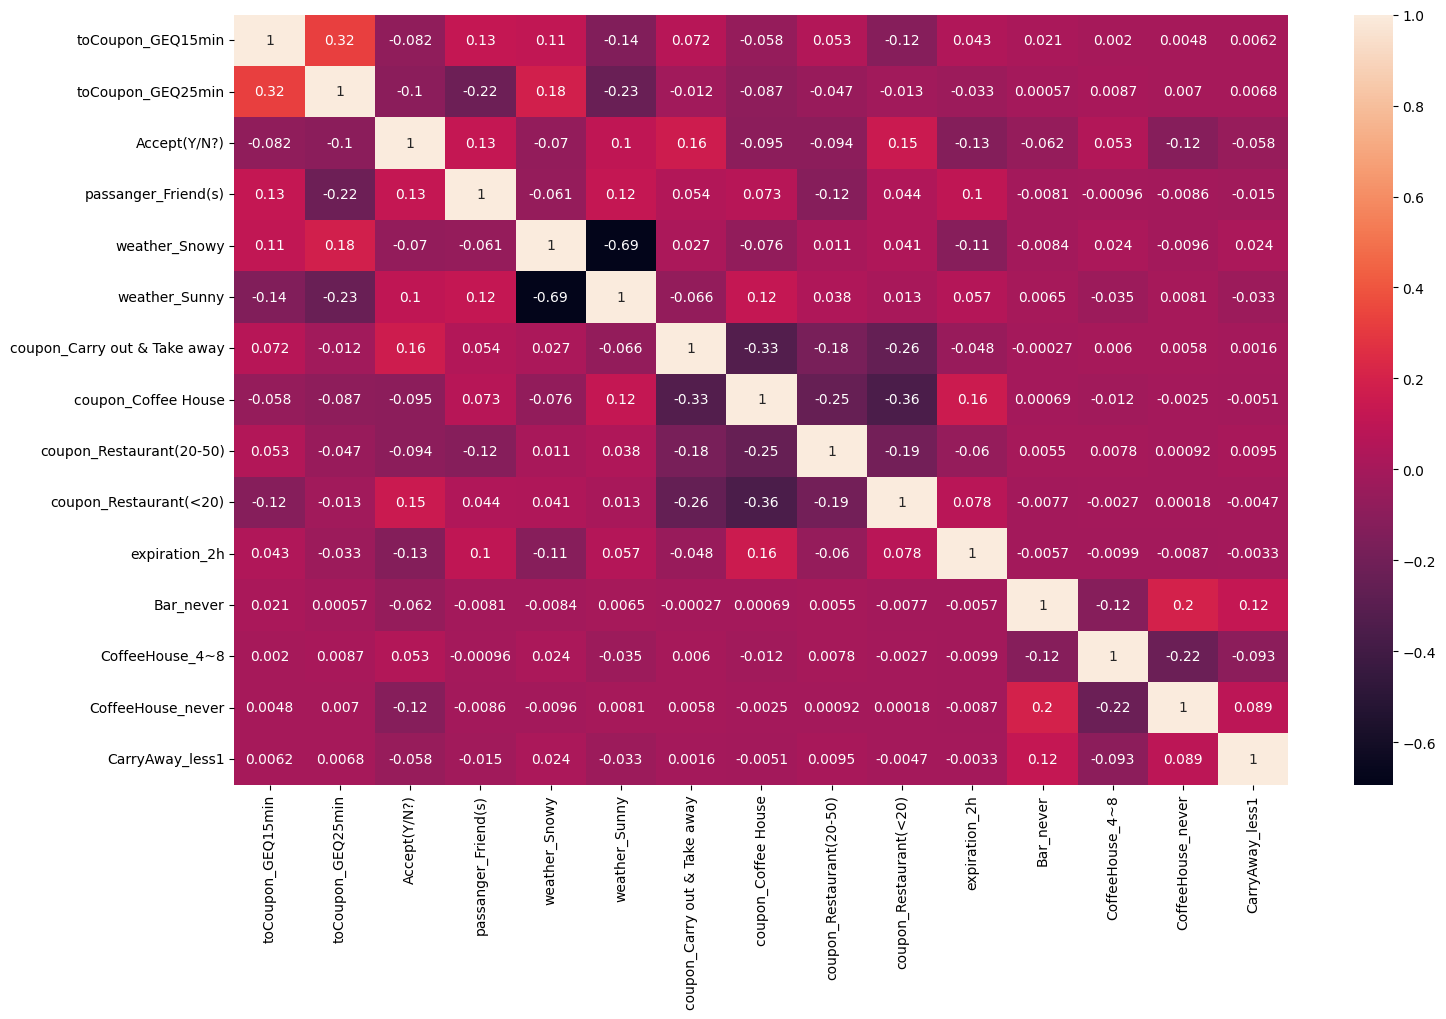

In [41]:
plt.figure(figsize = (17, 10))
sns.heatmap(df_dropped.corr(), annot = True)

In [67]:
# for column in df2.columns:
#     print(f'Column: {column}')
#     print(df2[column].value_counts())
#     print('\n')

In [85]:
x1 = df_dropped.drop(["Accept(Y/N?)"],axis=1)
y1 = df_dropped["Accept(Y/N?)"]

In [86]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
oversampler = RandomOverSampler(random_state=42)
x_resampled, y_resampled = oversampler.fit_resample(x1, y1)
print("Class distribution after resampling:", Counter(y_resampled))

Class distribution after resampling: Counter({1: 7210, 0: 7210})


In [87]:
x_resampled.rename(columns=column_mapping, inplace=True)

# Model training:-

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

## Logistic Regression:-

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100, stratify = y_resampled)

In [111]:
x_train.shape

(11536, 14)

## Random Forests:-

In [49]:
rf = RandomForestClassifier()

In [50]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [51]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

In [52]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [53]:
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

In [54]:
rf_y_pred = best_rf.predict(x_test)

## XGBoost:-

In [116]:
xg = XGBClassifier()

In [117]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
}

In [118]:
grid_search1 = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3)
grid_search1.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...in=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [119]:
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [120]:
best_params_xgb = grid_search1.best_params_
best_xgb = grid_search1.best_estimator_

In [121]:
xg_y_pred = best_xgb.predict(x_test)

# Model Evaluation and Accuracy Score:-

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Random forest score:-

In [59]:
accuracy = accuracy_score(y_test, rf_y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy on Test Set: {accuracy}')

Best Parameters: {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy on Test Set: 0.7619235317303902


In [60]:
print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71      1095
           1       0.76      0.84      0.80      1442

    accuracy                           0.76      2537
   macro avg       0.76      0.75      0.75      2537
weighted avg       0.76      0.76      0.76      2537



## XGboost score:-

In [126]:
accuracy1 = accuracy_score(y_test, xg_y_pred)
print(f'Best Parameters: {best_params_xgb}')
print(f'Accuracy on Test Set: {accuracy1}')

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Accuracy on Test Set: 0.6931345353675451


In [98]:
print(classification_report(y_test,xg_y_pred))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68      1442
           1       0.68      0.74      0.71      1442

    accuracy                           0.69      2884
   macro avg       0.69      0.69      0.69      2884
weighted avg       0.69      0.69      0.69      2884

